In [1]:
# =========================
# House Prices - Random Forest 完整流程
# =========================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
# -------------------------
# Step 1: 讀取資料
# -------------------------
data_path = r"D:\Github\kaggle_practice\house-prices-advanced-regression-techniques\data"
train = pd.read_csv(f"{data_path}/train.csv")
test = pd.read_csv(f"{data_path}/test.csv")

print("Train Data Preview:")
display(train.head(5))

print("\nTest Data Preview:")
display(test.head(5))

Train Data Preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Test Data Preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [2]:
# =========================
# Step 2-1: 資料檢查
# =========================
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# 顯示欄位型態與簡單描述
display(train.dtypes.value_counts())
display(train.describe(include='all').T.head(20))  # 前 20 個欄位的描述統計（方便第一眼看）


Train shape: (1460, 81)
Test shape: (1459, 80)


object     43
int64      35
float64     3
Name: count, dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# =========================
# Step 2-1: 資料檢查
# =========================

# 缺失值統計（顯示有缺值的欄位）
missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("Train missing columns:", len(missing))
display(missing.head(30))  # 顯示缺值最多的前 30 個欄位

Train missing columns: 19


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [4]:
# =========================
# Step 2-2: 粗略補值 + 特徵重要性分析（Random Forest）
#1. train_filled.drop('SalePrice', axis=1)
#把目標欄位 SalePrice 移除，只留下模型的輸入特徵。
#axis=1 表示從欄位（column）方向刪除。
#2. pd.get_dummies(...)
#用於將分類變數（object / string 型別）轉換為數字特徵的一種簡單方式，稱為 One-Hot Encoding。
# =========================


# Step 2-2.2：粗略填補缺失值
def rough_fill(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna("None")  # 類別型補 'None'
        else:
            df[col] = df[col].fillna(0)       # 數值型補 0
    return df

# Step 2-2.3：資料轉換與編碼
train_filled = rough_fill(train)
X = pd.get_dummies(train_filled.drop('SalePrice', axis=1))
y = train_filled['SalePrice']


In [5]:

# =========================
# Step 2-2: 粗略補值 + 特徵重要性分析（Random Forest）
# -------------------------
# model = RandomForestRegressor(...)
# 建立隨機森林模型：
# - n_estimators=100 表示用 100 棵決策樹組合
# model.fit(X, y)
# - 訓練模型，讓它學會 X（特徵）和 y（房價）之間的關聯
# 模型評估：
# - 用 RMSE（平方根均方誤差）衡量預測準確度，越低越好
# 特徵重要性 (feature_importances_)：
# - 幫助你找出哪些欄位對房價影響最大
# =========================

# Step 2-2.4：訓練 RandomForest 模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)  # 這裡 X 已經是 pd.get_dummies 編碼後的特徵

# Step 2-2.5：查看最重要的 20 個特徵
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

print("\nTop 20 Important Features:")
display(top_features)



Top 20 Important Features:


OverallQual     0.580217
GrLivArea       0.108840
TotalBsmtSF     0.036353
2ndFlrSF        0.030635
BsmtFinSF1      0.030554
GarageCars      0.025291
1stFlrSF        0.024644
GarageArea      0.012068
LotArea         0.012025
YearBuilt       0.008225
FullBath        0.007981
YearRemodAdd    0.007506
TotRmsAbvGrd    0.006221
GarageYrBlt     0.005944
MasVnrArea      0.005287
LotFrontage     0.005240
BsmtUnfSF       0.004338
Id              0.004290
WoodDeckSF      0.004213
OverallCond     0.004188
dtype: float64

In [6]:
# =========================
# Step 3: 使用重要特徵建立模型
# =========================

# 取出 top_features 的欄位名稱
top_features_list = top_features.index.tolist()

# 使用這些特徵做模型
X_top = X[top_features_list]
y_top = y

# 分訓練/驗證集
X_train, X_valid, y_train, y_valid = train_test_split(
    X_top, y_top, test_size=0.2, random_state=42
)

# 建立並訓練隨機森林
model_top = RandomForestRegressor(n_estimators=100, random_state=42)
model_top.fit(X_train, y_train)

# 驗證集預測
y_pred = model_top.predict(X_valid)

# 計算 RMSE
#rmse = mean_squared_error(y_valid, y_pred, squared=False)
#print(f"Validation RMSE: {rmse:.2f}")


rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse:.2f}")



Validation RMSE: 28500.59


In [7]:
# =========================
# Step 3: 使用重要特徵建立模型 (改進版)
# =========================

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假設 train_filled 已經做過粗略補值
# X 是 pd.get_dummies 編碼後的特徵矩陣
# y 是 SalePrice

# 1️⃣ 選取重要特徵
top_features_list = top_features.index.tolist()
X_top = X[top_features_list]
y_top = y.copy()

# 2️⃣ 可選：對目標變數做 log 轉換（減少極端值影響）
y_top_log = np.log1p(y_top)

# 3️⃣ 拆分訓練集 / 驗證集
X_train, X_valid, y_train, y_valid = train_test_split(
    X_top, y_top_log, test_size=0.2, random_state=42
)

# 4️⃣ 建立並訓練隨機森林模型
model_top = RandomForestRegressor(
    n_estimators=200,       # 增加樹的數量
    max_depth=20,           # 限制樹深，避免過擬合
    min_samples_leaf=2,
    random_state=42
)
model_top.fit(X_train, y_train)

# 5️⃣ 驗證集預測
y_pred_log = model_top.predict(X_valid)

# 6️⃣ 計算 RMSE（使用 log 轉換後）
rmse_log = np.sqrt(mean_squared_error(y_valid, y_pred_log))
print(f"Validation RMSE (log-transformed target): {rmse_log:.2f}")

# 7️⃣ 若要看原始單位 RMSE
y_pred = np.expm1(y_pred_log)  # 反 log1p
rmse_original = np.sqrt(mean_squared_error(y_valid.apply(np.expm1), y_pred))
print(f"Validation RMSE (original SalePrice unit): {rmse_original:.2f}")

# 8️⃣ 查看特徵重要性（前 10 名）
importances = pd.Series(model_top.feature_importances_, index=X_top.columns)
print("\nTop 10 Important Features:")
display(importances.sort_values(ascending=False).head(10))


Validation RMSE (log-transformed target): 0.15
Validation RMSE (original SalePrice unit): 29809.38

Top 10 Important Features:


OverallQual    0.563381
GrLivArea      0.123156
TotalBsmtSF    0.051532
GarageCars     0.043606
GarageArea     0.031084
BsmtFinSF1     0.028672
1stFlrSF       0.024689
YearBuilt      0.023979
LotArea        0.022169
OverallCond    0.014827
dtype: float64

In [8]:
# =========================
# Step 4: 改進模型 + 衍生特徵
# =========================

import xgboost as xgb

# 假設 train_filled 已經做過基本缺失值填補

# -------------------------
# 4-1. 衍生特徵
# -------------------------
train_fe = train_filled.copy()

# 1️⃣ 總面積
train_fe['TotalSF'] = train_fe['TotalBsmtSF'] + train_fe['1stFlrSF'] + train_fe['2ndFlrSF']

# 2️⃣ 房齡
train_fe['HouseAge'] = train_fe['YrSold'] - train_fe['YearBuilt']

# 3️⃣ 品質與面積交互特徵
train_fe['OverallQual_LivArea'] = train_fe['OverallQual'] * train_fe['GrLivArea']

# 4️⃣ 類別型欄位做 One-Hot Encoding
X = pd.get_dummies(train_fe.drop('SalePrice', axis=1))
y = np.log1p(train_fe['SalePrice'])  # log 轉換目標變數

# -------------------------
# 4-2. 拆分訓練集與驗證集
# -------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 4-3. 建立 XGBoost 模型
# -------------------------
model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 訓練模型
model_xgb.fit(X_train, y_train)

# -------------------------
# 4-4. 驗證集預測
# -------------------------
y_pred_log = model_xgb.predict(X_valid)

# RMSE in log space
rmse_log = np.sqrt(mean_squared_error(y_valid, y_pred_log))
print(f"Validation RMSE (log space): {rmse_log:.4f}")

# RMSE in original SalePrice unit
y_pred = np.expm1(y_pred_log)
rmse_orig = np.sqrt(mean_squared_error(np.expm1(y_valid), y_pred))
print(f"Validation RMSE (original SalePrice unit): {rmse_orig:.2f}")

# -------------------------
# 4-5. 特徵重要性
# -------------------------
importances = pd.Series(model_xgb.feature_importances_, index=X.columns)
print("\nTop 10 Important Features:")
display(importances.sort_values(ascending=False).head(10))


Validation RMSE (log space): 0.1349
Validation RMSE (original SalePrice unit): 25284.45

Top 10 Important Features:


OverallQual_LivArea    0.109353
CentralAir_N           0.076138
OverallQual            0.061538
TotalSF                0.060228
GarageCars             0.054976
KitchenAbvGr           0.037289
BsmtQual_Gd            0.023806
CentralAir_Y           0.023734
ExterQual_TA           0.023434
BsmtQual_Ex            0.023350
dtype: float32

In [9]:
# =========================
# Step 5: 使用模型對測試集生成預測
# =========================

# 1️⃣ 對測試集做粗略補值 & 衍生特徵
test_filled = rough_fill(test)

# 衍生特徵同訓練集
test_filled['TotalSF'] = test_filled['TotalBsmtSF'] + test_filled['1stFlrSF'] + test_filled['2ndFlrSF']
test_filled['HouseAge'] = test_filled['YrSold'] - test_filled['YearBuilt']
test_filled['OverallQual_LivArea'] = test_filled['OverallQual'] * test_filled['GrLivArea']

# 2️⃣ One-Hot Encoding
# 注意：測試集可能缺少訓練集的一些欄位，需要對齊
X_test = pd.get_dummies(test_filled)

# 對齊訓練集與測試集的欄位
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# 3️⃣ 用訓練好的模型做預測
y_test_pred_log = model_xgb.predict(X_test)

# 4️⃣ 轉回原始房價單位
y_test_pred = np.expm1(y_test_pred_log)

# 5️⃣ 生成提交檔案（Kaggle 格式）
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_test_pred
})

# 6️⃣ 存檔
submission_file = "house_prices_submission.csv"
submission.to_csv(submission_file, index=False)
print(f"Submission file saved to {submission_file}")

# ✅ 可以直接上 Kaggle 提交


Submission file saved to house_prices_submission.csv


Prediction Summary:
count      1459.000000
mean     177447.515625
std       75218.453125
min       47054.757812
25%      126991.949219
50%      157547.750000
75%      207497.109375
max      521089.062500
dtype: float64


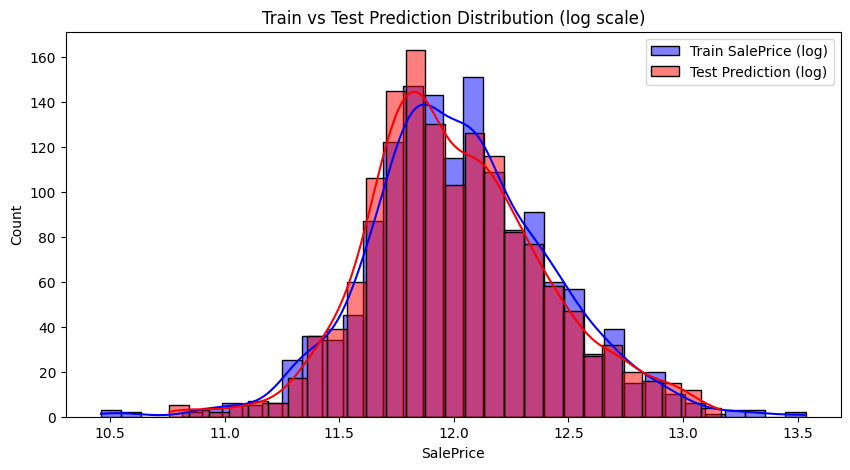

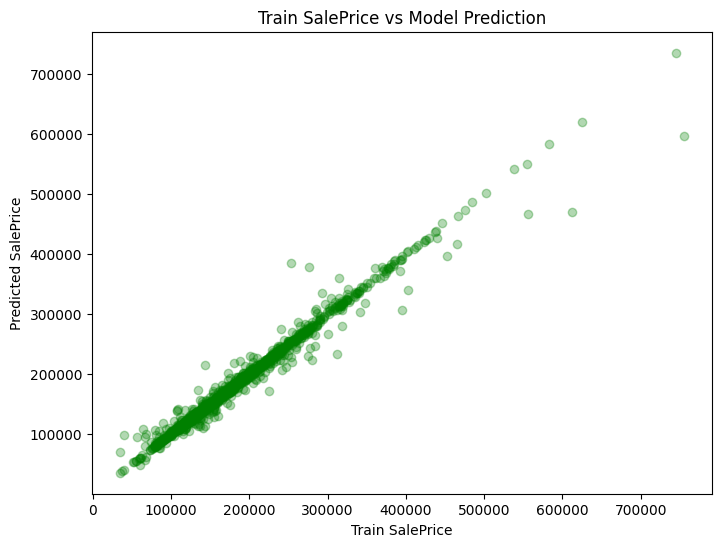

C:\Users\PC\AppData\Local\Temp\ipykernel_18832\3202056638.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_features.values, y=top20_features.index, palette="viridis")


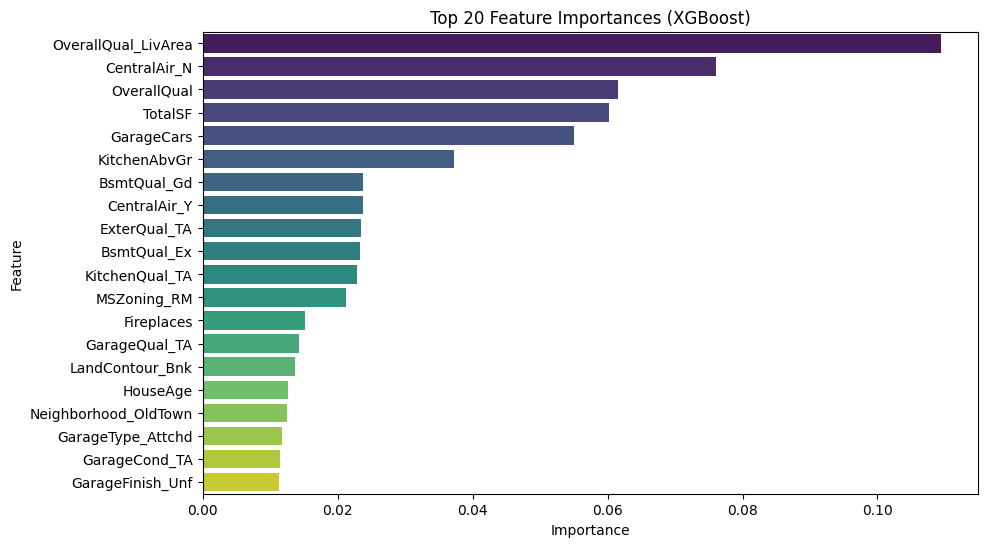

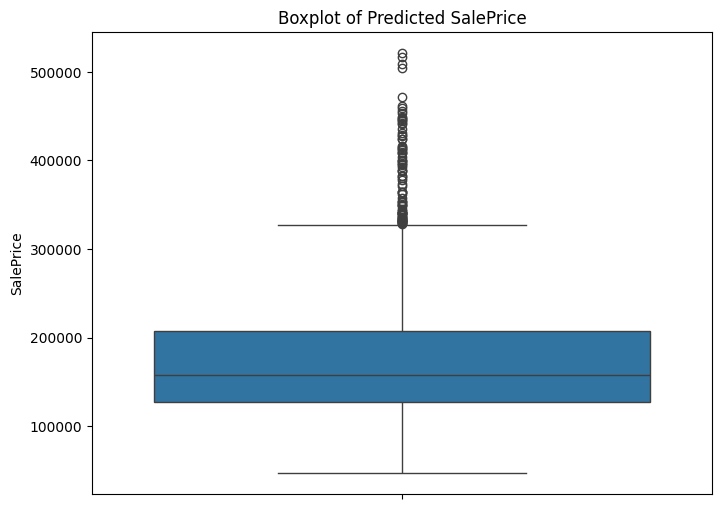

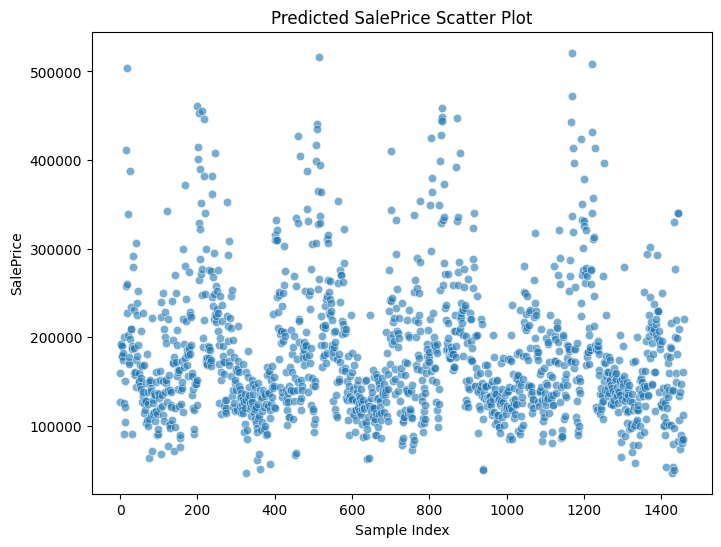

In [10]:
# =========================
# Step 6: 自我檢查預測結果
# =========================

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 基本描述統計
print("Prediction Summary:")
print(pd.Series(y_test_pred).describe())

# 2️⃣ 預測分布 vs 訓練集 SalePrice 分布
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(train['SalePrice']), color='blue', label='Train SalePrice (log)', kde=True)
sns.histplot(np.log1p(y_test_pred), color='red', label='Test Prediction (log)', kde=True)
plt.title("Train vs Test Prediction Distribution (log scale)")
plt.legend()
plt.show()

# 3️⃣ 預測 vs 訓練 SalePrice 關係（僅檢查範圍）
plt.figure(figsize=(8,6))
plt.scatter(train['SalePrice'], np.expm1(model_xgb.predict(pd.get_dummies(train_fe).reindex(columns=X.columns, fill_value=0))),
            alpha=0.3, color='green')
plt.xlabel("Train SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Train SalePrice vs Model Prediction")
plt.show()

# 4️⃣ 特徵重要性視覺化 (Top 20)
importances = pd.Series(model_xgb.feature_importances_, index=X.columns)
top20_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top20_features.values, y=top20_features.index, palette="viridis")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 5️⃣ 可選：房價預測箱型圖檢查離群值
plt.figure(figsize=(8,6))
sns.boxplot(y=y_test_pred)
plt.title("Boxplot of Predicted SalePrice")
plt.ylabel("SalePrice")
plt.show()

# 6️⃣ 可選：散布圖檢查預測範圍
plt.figure(figsize=(8,6))
sns.scatterplot(x=range(len(y_test_pred)), y=y_test_pred, alpha=0.6)
plt.title("Predicted SalePrice Scatter Plot")
plt.xlabel("Sample Index")
plt.ylabel("SalePrice")
plt.show()
